In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
adolencense = pd.read_csv("C:\\Users\\user\\Desktop\\dataset\\adolescentBirthRate.csv")

In [5]:
adolencense.head(10)

,Location,Period,Indicator,First Tooltip
0,Afghanistan,2017,Adolescent birth rate (per 1000 women aged 15-...,62.0
1,Afghanistan,2014,Adolescent birth rate (per 1000 women aged 15-...,77.2
2,Afghanistan,2013,Adolescent birth rate (per 1000 women aged 15-...,87.0
3,Afghanistan,2011,Adolescent birth rate (per 1000 women aged 15-...,125.7
4,Afghanistan,2009,Adolescent birth rate (per 1000 women aged 15-...,80.0
5,Afghanistan,2008,Adolescent birth rate (per 1000 women aged 15-...,90.0
6,Afghanistan,2007,Adolescent birth rate (per 1000 women aged 15-...,103.0
7,Afghanistan,2006,Adolescent birth rate (per 1000 women aged 15-...,126.2
8,Afghanistan,2005,Adolescent birth rate (per 1000 women aged 15-...,117.4
9,Afghanistan,2003,Adolescent birth rate (per 1000 women aged 15-...,151.8


In [6]:
allCountries = adolencense['Location'].unique().tolist()

In [11]:
def compareCountries(countries):
    fig = plt.figure(figsize = (10,10))
    ax1 = plt.subplot2grid((1,1),(0,0))

    for country in countries:
        if country not in allCountries:
            print(f"Country {country} DO NOT EXIST ")
            return
        tempData = adolencense[adolencense['Location'] == country]
        tempData['Period'] = pd.to_datetime(tempData['Period'], format = '%Y')
        ax1.plot(tempData['Period'], tempData['First Tooltip'], label=country)
        
    for tick in ax1.get_xticklabels():
        tick.set_rotation(45)
    plt.grid()
    plt.legend()
    plt.xlabel("Year")
    plt.ylabel("Adolencense Incidence")
    plt.title("Adolescent birth rate (per 1000 women aged 15-19 years)")
    plt.show()

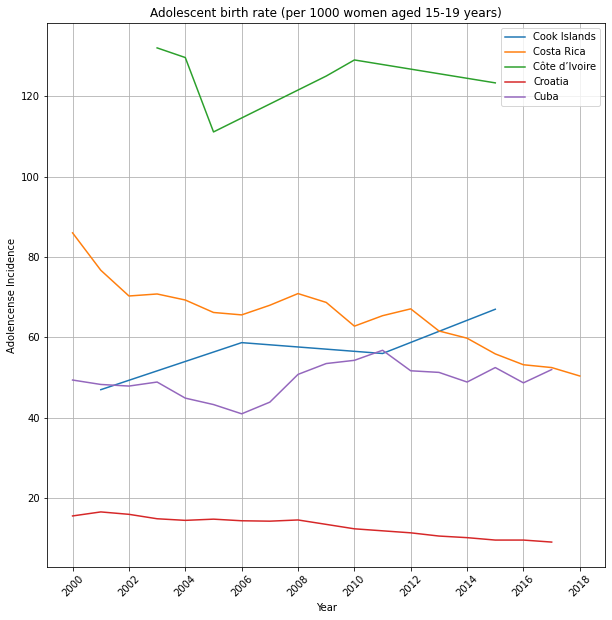

In [12]:
import random
i=random.randint(0,len(allCountries)-5)
countries=allCountries[i:i+5]
compareCountries(countries)
    

In [13]:
def autoLabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height, '%d'%int(height), ha='center', va = 'bottom')

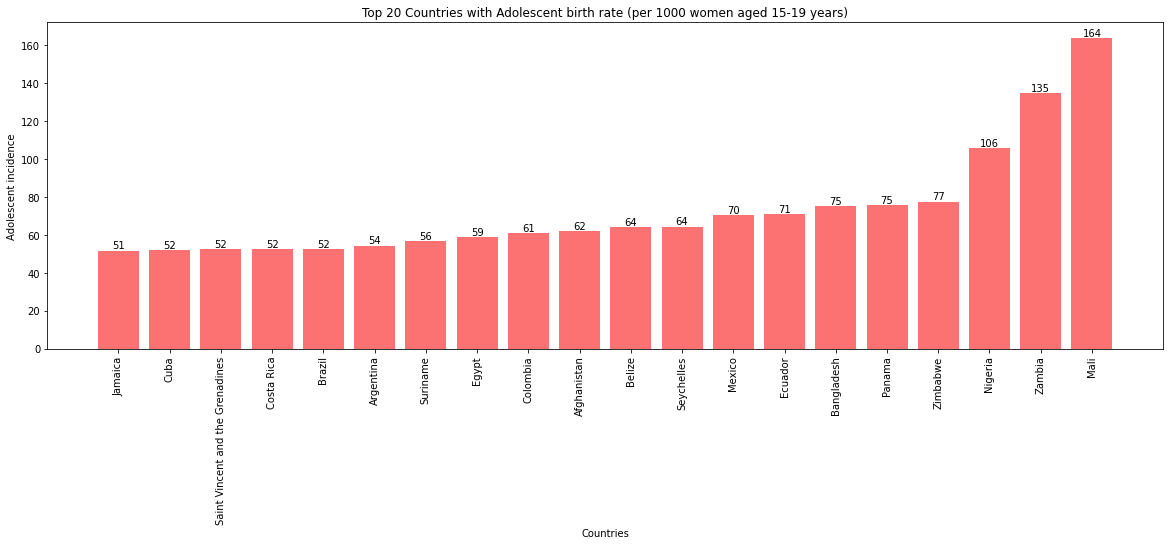

In [15]:
tempData = adolencense[adolencense['Period'] == 2017]
tempData.sort_values('First Tooltip', inplace=True)
tempDataBot = tempData[-20:]
fig = plt.figure(figsize=(20,6))
ax = plt.subplot2grid((1,1),(0,0))
rects = ax.bar(tempDataBot['Location'], tempDataBot['First Tooltip'], color = "#fc7272")
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
autoLabel(rects)
plt.xlabel("Countries")
plt.ylabel("Adolescent incidence")
plt.title("Top 20 Countries with Adolescent birth rate (per 1000 women aged 15-19 years)")
plt.show()

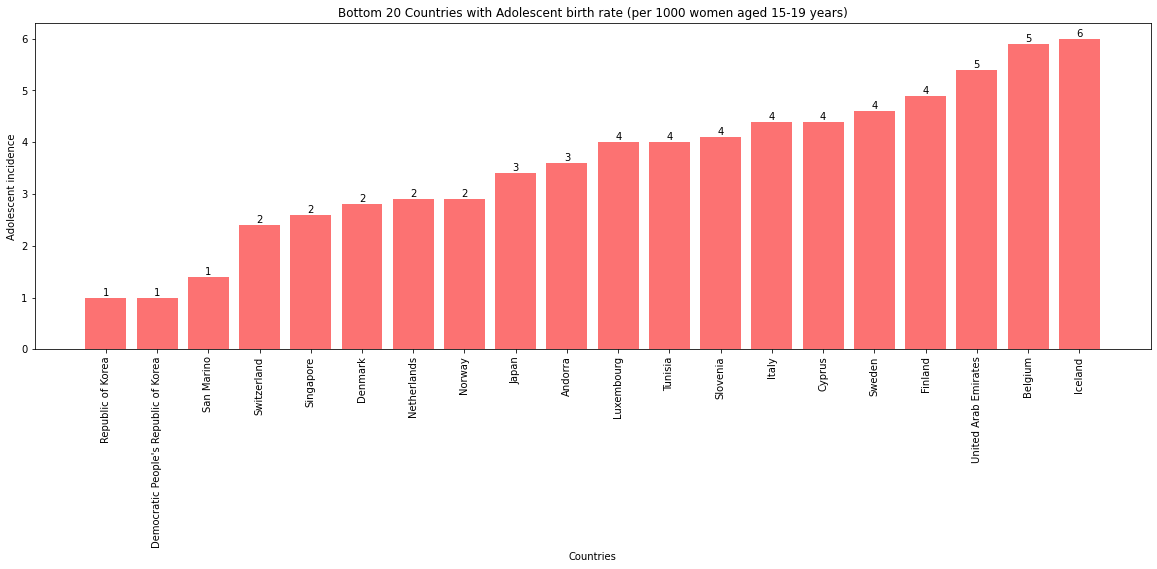

In [19]:
tempData = adolencense[adolencense['Period'] == 2017]
tempData.sort_values('First Tooltip', inplace=True)
tempDataBot = tempData[:20]
fig = plt.figure(figsize=(20,6))
ax = plt.subplot2grid((1,1),(0,0))
rects = ax.bar(tempDataBot['Location'], tempDataBot['First Tooltip'], color = "#fc7272")
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
autoLabel(rects)
plt.xlabel("Countries")
plt.ylabel("Adolescent incidence")
plt.title("Bottom 20 Countries with Adolescent birth rate (per 1000 women aged 15-19 years)")
plt.show()

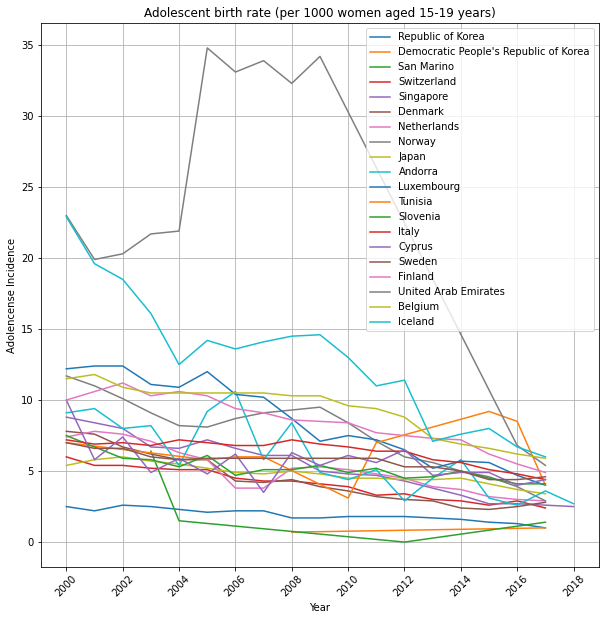

In [20]:
tempData = adolencense[adolencense['Period'] == 2017]
tempData.sort_values('First Tooltip', inplace=True)
tempDataBot = tempData[:20]
bestCountries=tempDataBot['Location'].values.tolist()
compareCountries(bestCountries)

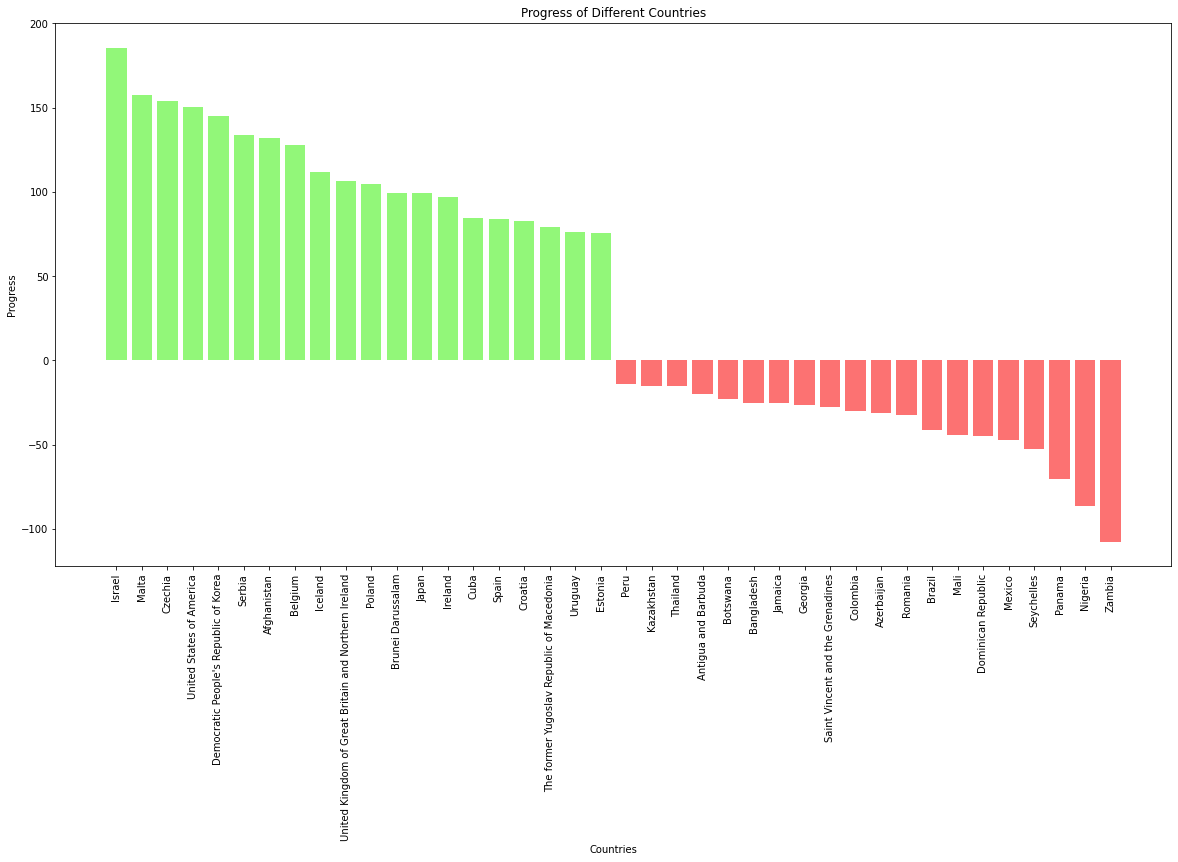

In [23]:

tempData2017 = adolencense[adolencense['Period'] == 2017]
tempData2000 = adolencense[adolencense['Period'] == 2000]
tempData2017.reset_index(inplace=True)
tempData2000.reset_index(inplace=True)
tempData = tempData2017.join(tempData2000, lsuffix='_17', rsuffix='_00')
tempData['progress'] = tempData['First Tooltip_00'] - tempData['First Tooltip_17']
tempData = tempData[['Location_17', 'progress']].sort_values('progress', ascending=False)
tempDataTop = tempData[:20]
tempDataBot = tempData[-20:]

fig = plt.figure(figsize=(20,10))

ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1)
rects1 = ax1.bar(tempDataTop['Location_17'], tempDataTop['progress'], color = '#92f779')
rects1 = ax1.bar(tempDataBot['Location_17'], tempDataBot['progress'], color = '#fc7272')
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)

plt.xlabel("Countries")
plt.ylabel("Progress")
plt.title("Progress of Different Countries")
plt.show()


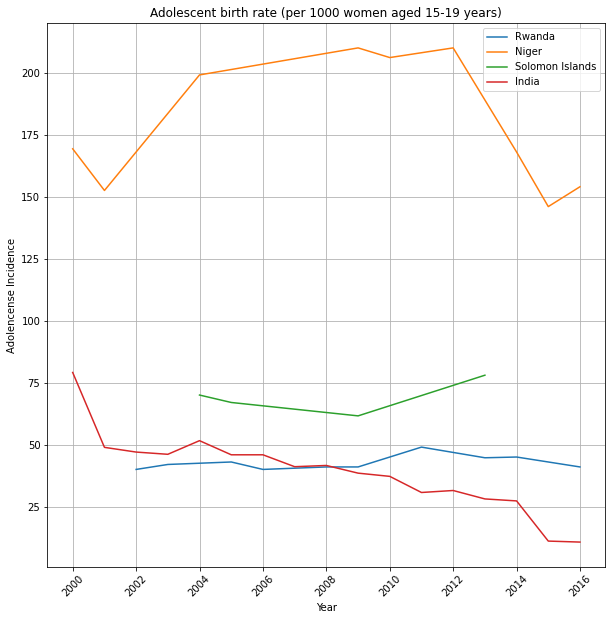

In [27]:
countries = ['Rwanda', 'Niger', 'Solomon Islands','India']
compareCountries(countries)